In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/경기과대/빅데이터 서포터즈/6월 발표/WHR2023.csv')
df.head(5)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [8]:
# 데이터 셋 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [13]:
# 필요한 열만 추출
df = df[['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']]
df.head(5)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,1.778
1,Denmark,7.586,10.962,0.954,71.250,0.934,0.134,0.196,1.778
2,Iceland,7.530,10.896,0.983,72.050,0.936,0.211,0.668,1.778
3,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,1.778
4,Netherlands,7.403,10.942,0.930,71.550,0.887,0.213,0.379,1.778


In [19]:
# 행복 지수로 정렬
df = df.sort_values('Ladder score',ascending=False)
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,1.778
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196,1.778
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668,1.778


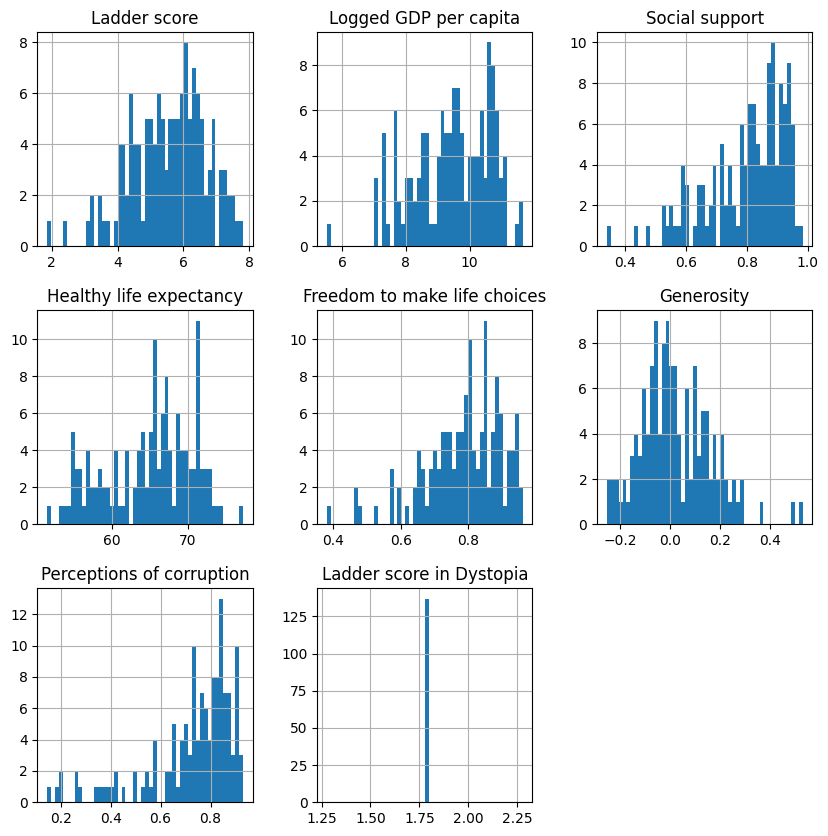

In [23]:
# 이상치 확인
df.hist(bins=50,figsize=(10,10))
plt.show()

In [27]:
# 이상치 열의 고유값 출력
df['Ladder score in Dystopia'].unique()

array([1.778])

In [32]:
# 값이 하나만 있으므로 분석에 필요없다 판단해 제거
df = df.drop(['Ladder score in Dystopia'],axis=1)
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668


In [85]:
# Ladder score를 반올림하고 Rank로 열을 만듬
rank = list(df['Ladder score'].round(0))
df['Rank'] = rank
df.head(3)

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
0,Finland,7.804,10.792,0.969,71.15,0.961,-0.019,0.182,8.0
1,Denmark,7.586,10.962,0.954,71.25,0.934,0.134,0.196,8.0
2,Iceland,7.530,10.896,0.983,72.05,0.936,0.211,0.668,8.0


In [86]:
# 각 랭크 별로 Ladder score가 가장 높은 국가 8개 변수에 저장
df_rank = pd.DataFrame({
    'Country name':[],'Ladder score':[],'Logged GDP per capita':[],'Social support':[],'Healthy life expectancy':[],'Freedom to make life choices':[],'Generosity':[],'Perceptions of corruption':[],'Rank':[]
})
for i in range(1,9):
    max_score = df[df['Rank']==i]['Ladder score'].max()
    df_con = df.loc[(df['Ladder score'] == max_score) & (df['Rank']==i)]
    df_rank = pd.concat([df_rank,df_con],ignore_index = True)
df_rank

,Country name,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Rank
0,Lebanon,2.392,9.478,0.530,66.149,0.474,-0.141,0.891,2.0
1,Malawi,3.495,7.302,0.531,58.475,0.750,0.005,0.749,3.0
2,Tunisia,4.497,9.244,0.730,67.000,0.576,-0.213,0.907,4.0
3,Bulgaria,5.466,10.087,0.918,66.500,0.801,-0.057,0.911,5.0
4,Uruguay,6.494,10.037,0.913,67.500,0.895,-0.065,0.575,6.0
5,Israel,7.473,10.639,0.943,72.697,0.809,-0.023,0.708,7.0
6,Finland,7.804,10.792,0.969,71.150,0.961,-0.019,0.182,8.0


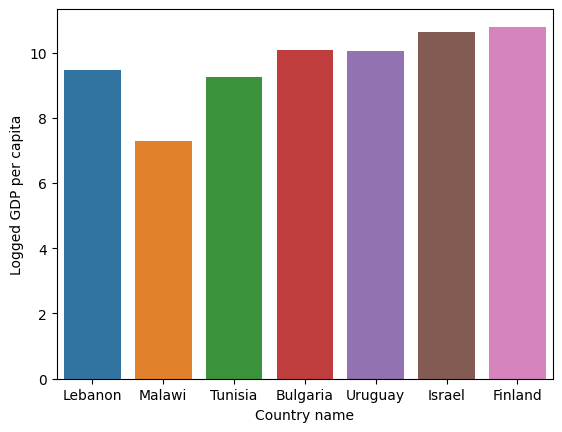

In [129]:
# 1인당 국내 총 생산 ( 편차가 크지 않음, 영향 별로 없음, 심지어 랭크가 더 높은 말라위는 레바논보다 GDP가 낮음)
sns.barplot(data = df_rank, x = 'Country name',y = 'Logged GDP per capita')
plt.show()

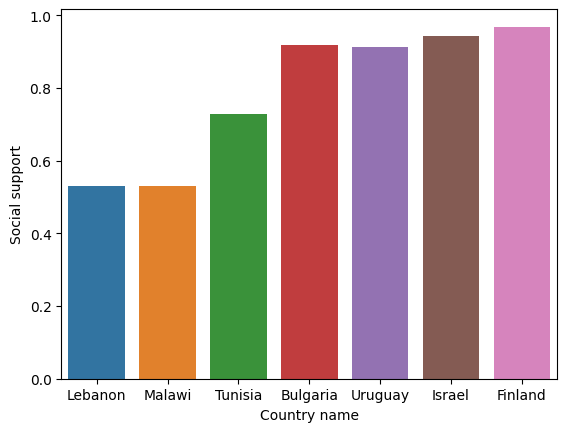

In [130]:
# 사회적 지원 ( 랭크가 높을 수록 사회적 지원률이 높게 나옴, 즉 크게 영향 끼침 )
sns.barplot(data = df_rank, x = 'Country name',y = 'Social support')
plt.show()

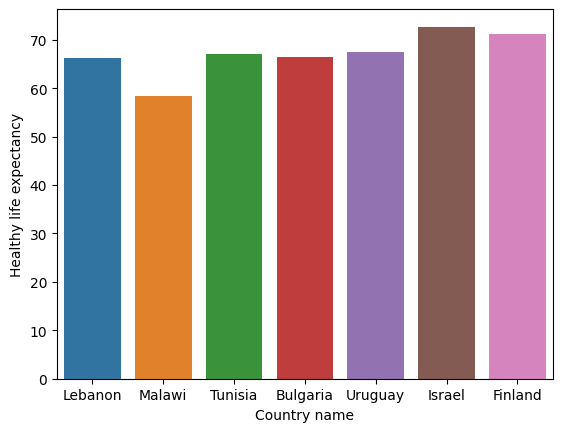

In [131]:
# 평균 수명 (평균 수명에 따른 랭크 차이가 거의 없음 즉, 영향이 크지 않다 볼 수 있음)
sns.barplot(data = df_rank, x = 'Country name',y = 'Healthy life expectancy')
plt.show()

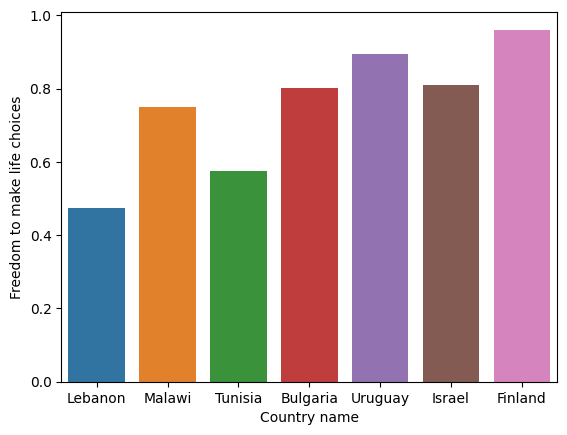

In [133]:
# 살고 싶은 삶을 살 수 있는지 ( 랭크가 낮을 수록 낮은 경향을 보임)
sns.barplot(data = df_rank, x = 'Country name',y = 'Freedom to make life choices')
plt.show()

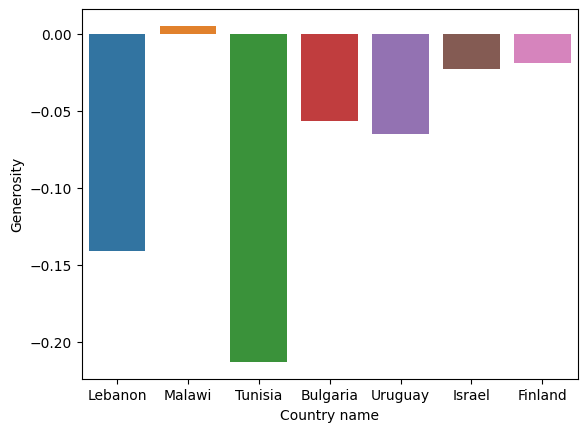

In [134]:
# 살고 싶은 삶을 살 수 있는지 ( 랭크가 낮을 수록 낮은 경향을 보임)
sns.barplot(data = df_rank, x = 'Country name',y = 'Generosity')
plt.show()